<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-8-airbnb-nyc?scriptVersionId=255382991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Airbnb NYC: Price and Review Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


-> To begin the analysis, we import the essential Python libraries:

pandas for data manipulation and analysis.

numpy for numerical operations.

matplotlib.pyplot for visualizing the data.

In [2]:
import matplotlib.pyplot as plt

-> We load the Newyork Airbnb Data using pandas.read_csv(), which reads the data from the provided file path and stores it in a DataFrame named df

In [3]:
df=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df=pd.DataFrame(df)

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we have empty values in name host_name, Last Review, reviews_per_month

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.shape

(48895, 16)

Fill null values using Fill na method

In [6]:
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review has NaT value which is fine

In [7]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


In [8]:
# Basic statistics
print(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe())

# Range = max - min
price_range = df['price'].max() - df['price'].min()
print(f"Price range: {price_range}")

              price  minimum_nights  number_of_reviews  reviews_per_month
count  48895.000000    48895.000000       48895.000000       48895.000000
mean     152.720687        7.029962          23.274466           1.090910
std      240.154170       20.510550          44.550582           1.597283
min        0.000000        1.000000           0.000000           0.000000
25%       69.000000        1.000000           1.000000           0.040000
50%      106.000000        3.000000           5.000000           0.370000
75%      175.000000        5.000000          24.000000           1.580000
max    10000.000000     1250.000000         629.000000          58.500000
Price range: 10000


The dataset contains 48,895 listings with price ranging from \$0 to \$10,000, though most are under \$175.  
Minimum nights range from 1 to 1250, with a median of 3 nights—indicating short stays are common.  
Reviews per month vary widely, averaging around 1.09, with some listings receiving up to 58.5 monthly.


**Distribution of Price (Under $500)**

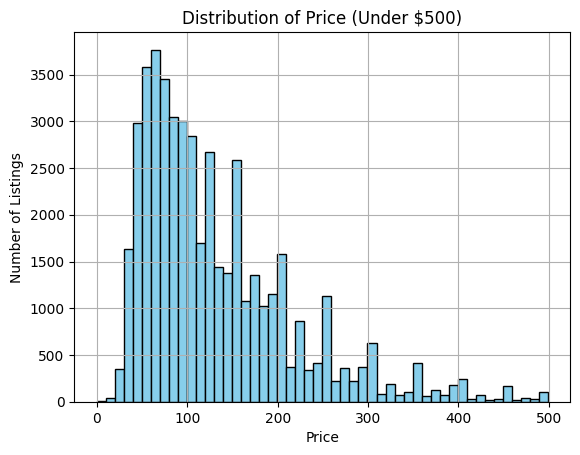

In [9]:
import matplotlib.pyplot as plt

# Limit price to < $500 for better visibility
df[df['price'] < 500]['price'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price (Under $500)')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


Most listings are priced between 50 and 150, with the peak around the 75–100 range.  
The distribution is right-skewed, indicating fewer listings at higher price points approaching $500.

**BAr Chart- Average Price by Room Type**

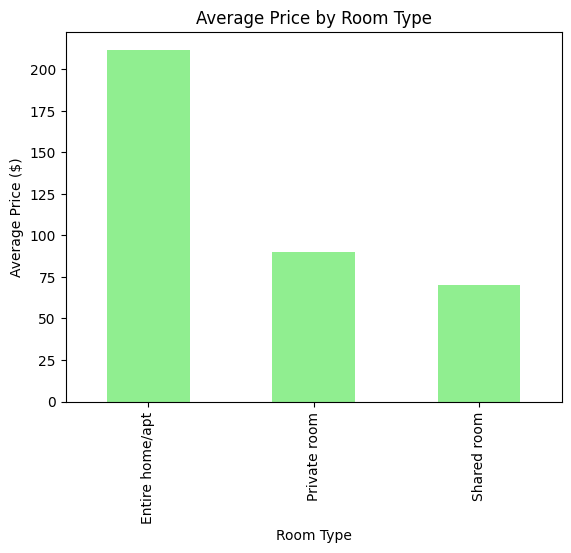

In [10]:
room_price = df.groupby('room_type')['price'].mean()
room_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.show()


Entire homes/apartments have the highest average price, significantly more than other room types.  
Private rooms and shared rooms are more affordable, with shared rooms being the cheapest on average.


**Average Price By Borough**

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


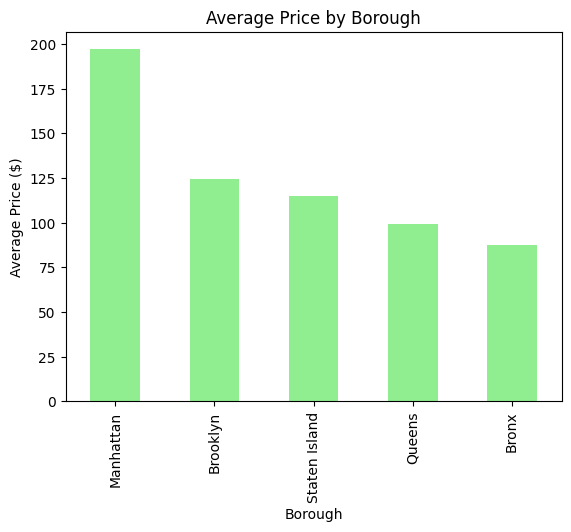

In [11]:
borough_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(borough_price)

borough_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Borough')
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.show()



Manhattan have high prices compared to other borough

**who are the top 10 hosts with most listings**

In [12]:
top_hosts = df['host_name'].value_counts().head(10)
print("Top 10 Hosts with Most Listings:")
print(top_hosts)


Top 10 Hosts with Most Listings:
host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: count, dtype: int64


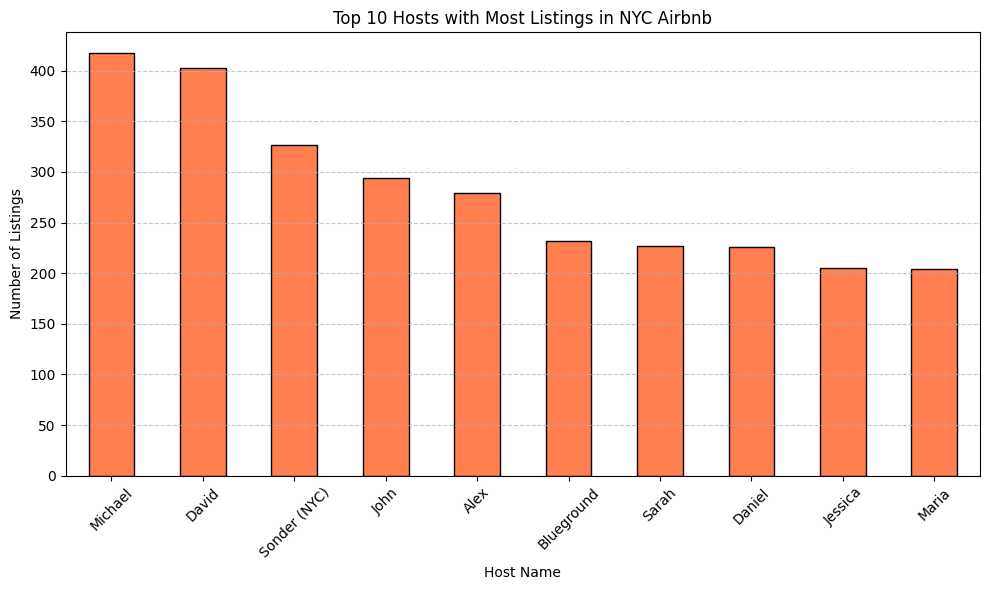

In [13]:
plt.figure(figsize=(10,6))
top_hosts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 10 Hosts with Most Listings in NYC Airbnb')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Michael and David are the top hosts in NYC Airbnb listings, each managing over 400 listings.  
Other top hosts like Sonder (NYC), John, and Alex have fewer listings, with a gradual decline down the list.


**which listings available for 365 days**

In [14]:
full_year_available = df[df['availability_365'] == 365].shape[0]
print(f"Listings available all year: {full_year_available}")


Listings available all year: 1295


**what are the highest price lisings and lowest price listings**

In [15]:
# Highest price listing
highest_price = df[df['price'] == df['price'].max()]
print("🔺 Highest Price Listing:")
print(highest_price[['name', 'host_name', 'neighbourhood_group', 'room_type', 'price']])

# Lowest price listing (non-zero)
lowest_price = df[df['price'] > 0].sort_values('price').head(1)
print("\n🔻 Lowest Non-Zero Price Listing:")
print(lowest_price[['name', 'host_name', 'neighbourhood_group', 'room_type', 'price']])


🔺 Highest Price Listing:
                                                  name host_name  \
9151               Furnished room in Astoria apartment  Kathrine   
17692  Luxury 1 bedroom apt. -stunning Manhattan views      Erin   
29238                              1-BR Lincoln Center    Jelena   

      neighbourhood_group        room_type  price  
9151               Queens     Private room  10000  
17692            Brooklyn  Entire home/apt  10000  
29238           Manhattan  Entire home/apt  10000  

🔻 Lowest Non-Zero Price Listing:
                                                    name host_name  \
24100  Girls only, cozy room one block from Times Square     Mario   

      neighbourhood_group    room_type  price  
24100           Manhattan  Shared room     10  


**Top Reviewed Listings**

In [16]:
top_reviewed = df.sort_values('number_of_reviews', ascending=False).head(5)
print("Top 5 Most Reviewed Listings:")
top_reviewed[['name', 'host_name', 'number_of_reviews', 'neighbourhood_group']]


Top 5 Most Reviewed Listings:


,name,host_name,number_of_reviews,neighbourhood_group
11759,Room near JFK Queen Bed,Dona,629,Queens
2031,Great Bedroom in Manhattan,Jj,607,Manhattan
2030,Beautiful Bedroom in Manhattan,Jj,597,Manhattan
2015,Private Bedroom in Manhattan,Jj,594,Manhattan
13495,Room Near JFK Twin Beds,Dona,576,Queens


**Average Reviews Per Month by Room Type:**

In [17]:
avg_reviews = df.groupby('room_type')['reviews_per_month'].mean().sort_values(ascending=False)
print(" Average Reviews Per Month by Room Type:")
avg_reviews

 Average Reviews Per Month by Room Type:


room_type
Private room       1.143493
Shared room        1.073345
Entire home/apt    1.045509
Name: reviews_per_month, dtype: float64

In [18]:
# Filter out listings with 0 reviews
non_zero_reviews = df[df['number_of_reviews'] > 0]

# Sort in ascending order and take the bottom 5
bottom_reviewed = non_zero_reviews.sort_values('number_of_reviews', ascending=True).head(5)

# Display the results
print("Bottom 5 Reviewed Listings (excluding 0 reviews):")
bottom_reviewed[['name', 'host_name', 'number_of_reviews', 'neighbourhood_group']]

Bottom 5 Reviewed Listings (excluding 0 reviews):


,name,host_name,number_of_reviews,neighbourhood_group
23301,Exquisite Single Bedroom in Shared Apartment C9,Yohan,1,Manhattan
20632,Spectacular 2BR with NYC SKYLINE VIEW + ROOF DECK,Prithvi,1,Brooklyn
20661,Wonderful UES Studio...,Eddie,1,Manhattan
20674,"Sixth Ave Chelsea, 1bd Serviced Apartment",Ken,1,Manhattan
20685,Cozy and quiet 1 bedroom in great neighborhood,Melissa,1,Brooklyn


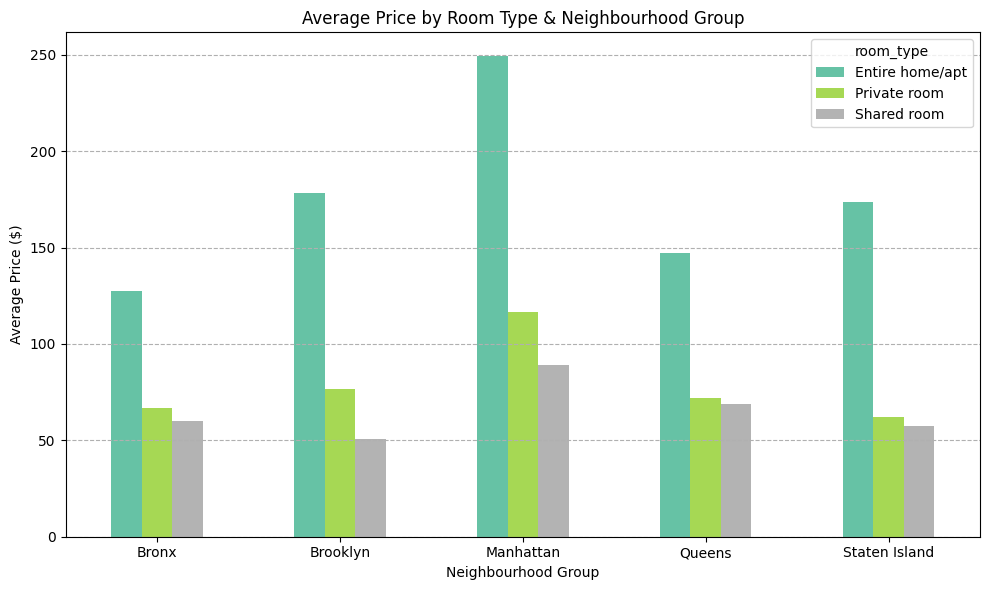

In [19]:
room_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
room_price.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Average Price by Room Type & Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Manhattan has the highest average prices across all room types, especially for entire homes/apartments.  
Across all neighbourhoods, shared rooms are the most affordable, while entire homes consistently cost the most.


# Summary 
Most listings are priced between 50 and 150, peaking around 75–100. The price distribution is right-skewed with some listings priced very high.

Entire homes/apartments are the most expensive, while shared rooms are the most affordable.

Manhattan has the highest prices overall. Private rooms get slightly more reviews per month than shared rooms or entire homes.


Private rooms get the highest average reviews per month (1.14), followed closely by shared rooms and entire homes.

Price is heavily influenced by room type and location, with Manhattan and entire homes fetching premium rates, while shared rooms are both cheaper and relatively well-reviewed.
